***
# Reading the file
***

In [13]:
with open('cont.csv', 'r') as file:
    text = file.read()

In [14]:
text = text.split('\n')

In [15]:
text[28]

'Timestamp;Time_Offset;100.00;102.00;104.00;106.00;108.00;110.00;112.00;114.00;116.00;118.00;120.00;122.00;124.00;126.00;128.00;130.00;132.00;134.00;136.00;138.00;140.00;142.00;144.00;146.00;148.00;150.00;152.00;154.00;156.00;158.00;160.00;162.00;164.00;166.00;168.00;170.00;172.00;174.00;176.00;178.00;180.00;182.00;184.00;186.00;188.00;190.00;192.00;194.00;196.00;198.00;200.00;202.00;204.00;206.00;208.00;210.00;212.00;214.00;216.00;218.00;220.00;222.00;224.00;226.00;228.00;230.00;232.00;234.00;236.00;238.00;240.00;242.00;244.00;246.00;248.00;250.00;252.00;254.00;256.00;258.00;260.00;262.00;264.00;266.00;268.00;270.00;272.00;274.00;276.00;278.00;280.00;282.00;284.00;286.00;288.00;290.00;292.00;294.00;296.00;298.00;300.00;302.00;304.00;306.00;308.00;310.00;312.00;314.00;316.00;318.00;320.00;322.00;324.00;326.00;328.00;330.00;332.00;334.00;336.00;338.00;340.00;342.00;344.00;346.00;348.00;350.00;352.00;354.00;356.00;358.00;360.00;362.00;364.00;366.00;368.00;370.00;372.00;374.00;376.00;378.

In [16]:
data = []

for line in text:
    candidate = line.split(';')
    if len(candidate) > 100:
        data.append(candidate)

len(data)

178

In [17]:
class TimeResolvedRaman():

    def __init__(self,x,y,time_t,time_s):
        self.time_t = time_t
        self.time_s = time_s
        self.x = x
        self.y = y

In [18]:
wavenumbers = data.pop(0)[2:]
xaxis = []

for e in wavenumbers:
    xaxis.append(float(e.replace(',', '.')))

yf = []

for line in data:
    st_list = line[2:]
    fl_list = []
    for e in st_list:
        fl_list.append(float(e.replace(',', '.')))
    raman = TimeResolvedRaman(xaxis, fl_list, line[1], line[0])
    yf.append(raman)

In [22]:
import matplotlib.pyplot as plt
# Creating a plot for each spectrum within the
# ign_out folder

for i in range(len(yf)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(yf[i].x, yf[i].y)
    ax.set_title(yf[i].time_s)
    ax.set_xlabel('Wavenumber (cm-1)')
    ax.set_ylabel('Intensity (a.u.)')
    # ax.set_xlim(1800, 1000)
    # ax.set_ylim(0, 1.1)
    # Formating the name 
    plt.savefig('ign_out/'+str(i)+'.png')
    plt.close()

In [3]:
# Creating a video from the images, the video waits a half second
# between each frame, and each frame is shown for a half second
# as well.

import cv2
import numpy as np
import glob

img_array = []
for i in range(0,177):
    img = cv2.imread('ign_out/'+str(i)+'.png')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('ign_out/ignition.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


***
# Normalization
***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


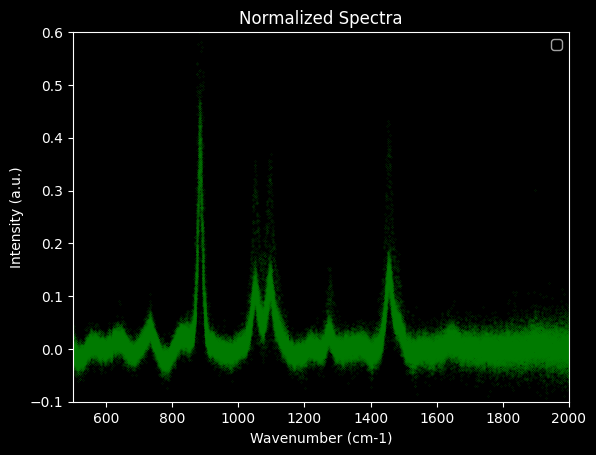

In [35]:
# Normalizing all the spectra 

import matplotlib.pyplot as plt

normalized = []

for i in range(len(yf)):
    norm = []
    for e in yf[i].y:
        norm.append(e/max(yf[i].y))
    normalized.append(norm)

# Plotting the normalized spectra
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(normalized)):
    ax.scatter(yf[i].x, normalized[i], s=0.01, color='green')  # Set the color to green

ax.set_title('Normalized Spectra')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlim(500, 2000)
ax.set_ylim(-0.1,0.6)  # Set the x-axis limits
ax.legend()

plt.show()


***
# Creating another videos
***

In [23]:
# Now we integrate all the images within the spexs directory 
# as a single mp4 video

import cv2
import numpy as np
import glob

img_array = []

for filename in glob.glob('ign_out/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('project_2.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


Text(0, 0.5, 'R.I.')

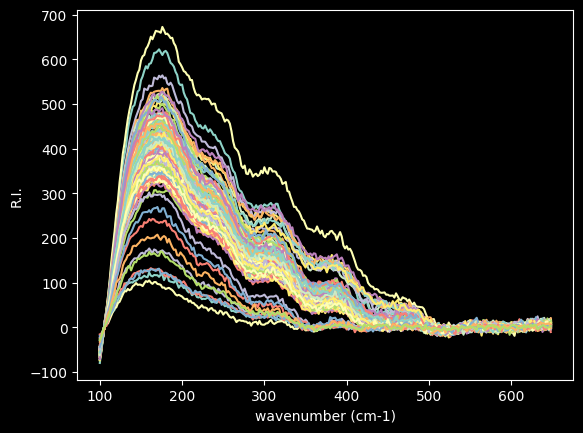

In [8]:
n = int(len(xf) * 0.25)

for e in yf:
    plt.plot(xf[:n], e[:n])

# Title of the axis

plt.xlabel('wavenumber (cm-1)')
plt.ylabel('R.I.')

***
# Saving the file
***

In [10]:
# Converting the xf and yf into an excel file

import pandas as pd

df = pd.DataFrame(yf, index = range(1, len(yf) + 1), columns = xf)


In [12]:
# Saving the dataframe as an excel file

df.to_excel('cont.xlsx')

***
# Reading the initial and final points
***

In [37]:
with open('comparacion/final.csv', 'r') as file:
    final = file.read()

final = final.split('\n')

with open('comparacion/inicial.csv', 'r') as file:
    inicial = file.read()

inicial = inicial.split('\n')


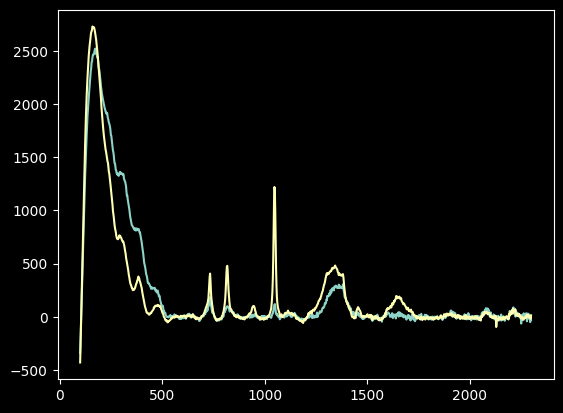

In [39]:
import matplotlib.pyplot as plt

x,y = [],[]
xf, yf = [],[]
for line in inicial[32:]:
    line = line.split(';')
    x.append(float(line[0]))
    y.append(float(line[1]))

for line in final[32:]:
    line = line.split(';')
    xf.append(float(line[0]))
    yf.append(float(line[1]))

# Plotting the initial and final spectra

plt.plot(x,y, label = 'initial')
plt.plot(xf,yf, label = 'final')